<a href="https://colab.research.google.com/github/SamuilMladenov/LearnPyTorch/blob/main/01_training_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Import all the needed libraries
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# Add the known data
amplitude = 0.45
frequency = 0.25
phase_shift = np.pi/2 # 90 degree shift
vertical_shift = 0

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = amplitude * np.sin(frequency * X + phase_shift) + vertical_shift

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4500],
         [0.4500],
         [0.4500],
         [0.4499],
         [0.4499],
         [0.4499],
         [0.4498],
         [0.4497],
         [0.4496],
         [0.4495]]))

In [70]:
# Create the train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [71]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

  # Are there predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

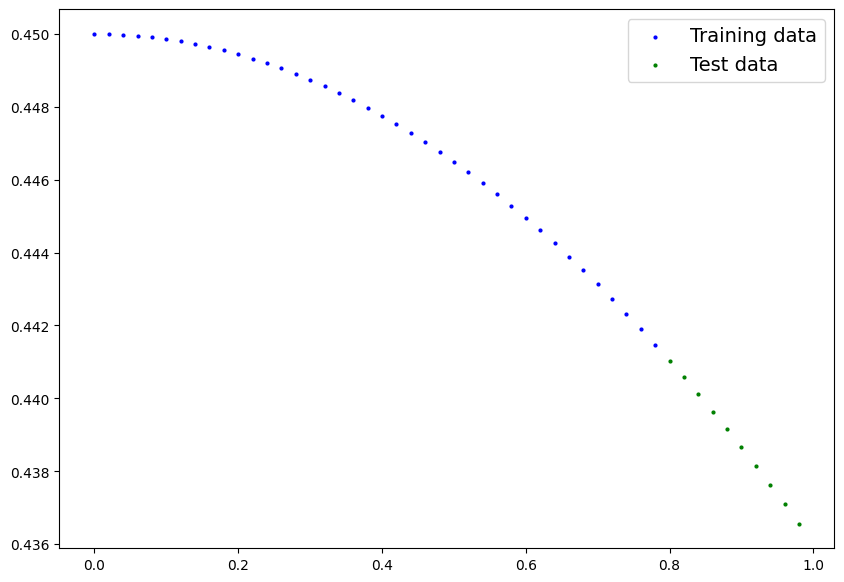

In [72]:
plot_predictions()